In [1]:
! python -m pip install tensorflow

In [2]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
medium_data = pd.read_csv("C:\\git\\dados\\medium_data.csv")

In [4]:
medium_data.shape

(6508, 10)

In [5]:
medium_data["title"]

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [6]:
medium_data["title"] = medium_data["title"].str.replace(u'\xa0', u' ')

In [7]:
medium_data["title"] = medium_data["title"].str.replace('\u200a', ' ')

In [8]:
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(medium_data['title'])

In [33]:
tokenizer.word_index

{'<oov>': 1,
 'to': 2,
 'the': 3,
 'strong': 4,
 'a': 5,
 'of': 6,
 'how': 7,
 'and': 8,
 'in': 9,
 'your': 10,
 'markup': 11,
 'for': 12,
 'you': 13,
 'with': 14,
 'is': 15,
 '—': 16,
 'data': 17,
 'why': 18,
 'class': 19,
 'h3': 20,
 'i': 21,
 'what': 22,
 'on': 23,
 'learning': 24,
 'from': 25,
 'an': 26,
 'be': 27,
 'my': 28,
 'writing': 29,
 'are': 30,
 'it': 31,
 'can': 32,
 'using': 33,
 'design': 34,
 'machine': 35,
 'ux': 36,
 'about': 37,
 'do': 38,
 'not': 39,
 'python': 40,
 'ai': 41,
 'life': 42,
 'that': 43,
 'when': 44,
 'should': 45,
 'we': 46,
 '5': 47,
 'science': 48,
 'make': 49,
 'time': 50,
 'need': 51,
 'as': 52,
 '3': 53,
 'more': 54,
 'at': 55,
 'business': 56,
 'or': 57,
 'part': 58,
 'have': 59,
 'work': 60,
 'new': 61,
 'don’t': 62,
 'up': 63,
 'by': 64,
 'write': 65,
 'get': 66,
 'use': 67,
 'guide': 68,
 'will': 69,
 'marketing': 70,
 '1': 71,
 'ways': 72,
 'deep': 73,
 'best': 74,
 'analysis': 75,
 'first': 76,
 '2019': 77,
 'product': 78,
 'better': 79,
 

In [10]:
total_words = len(tokenizer.word_index) + 1

In [11]:
linha = medium_data["title"][0]
token_list = tokenizer.texts_to_sequences([linha])[0]
token_list

[5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]

In [12]:
input_sequence = []
for line in medium_data["title"]:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequence.append(n_gram_sequence)

In [13]:
input_sequence

[[5, 676],
 [5, 676, 68],
 [5, 676, 68, 2],
 [5, 676, 68, 2, 452],
 [5, 676, 68, 2, 452, 1518],
 [5, 676, 68, 2, 452, 1518, 14],
 [5, 676, 68, 2, 452, 1518, 14, 2455],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99],
 [1858, 23],
 [1858, 23, 741],
 [1858, 23, 741, 81],
 [1858, 23, 741, 81, 103],
 [1858, 23, 741, 81, 103, 14],
 [1858, 23, 741, 81, 103, 14, 345],
 [1858, 23, 741, 81, 103, 14, 345, 345],
 [1858, 23, 741, 81, 103, 14, 345, 345, 1859],
 [7, 2],
 [7, 2, 67],
 [7, 2, 67, 3654],
 [7, 2, 67, 3654, 9],
 [7, 2, 67, 3654, 9, 40],
 [3655, 7],
 [3655, 7, 2],
 [3655, 7, 2, 266],
 [3655, 7, 2, 266, 1283],
 [3655, 7, 2, 266, 1283, 9],
 [3655, 7, 2, 266, 1283, 9, 2456],
 [3655, 7, 2, 266, 1283, 9, 2456, 23],
 [3655, 7, 2, 266, 1283, 9, 2456, 23, 10],
 [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938],
 [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938, 222],
 [5, 192],
 [5, 192, 64],
 [5, 192, 64, 192],
 [5, 192, 64, 192, 485],
 [5, 192, 64, 192, 485,

In [14]:
maximo = 0
for x in input_sequence:
    if len(x) > maximo:
        maximo = len(x)
maximo

40

In [15]:
input_sequences = pad_sequences(input_sequence, maxlen=maximo, padding='pre')

In [16]:
input_sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
       676])

In [17]:
entrada = input_sequences[0, :-1]
label = input_sequences[0, -1]
print(entrada)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5]
676


In [18]:
xs = input_sequences[:, :-1]
labels = input_sequences[:,-1]

In [19]:
xs

array([[  0,   0,   0, ...,   0,   0,   5],
       [  0,   0,   0, ...,   0,   5, 676],
       [  0,   0,   0, ...,   5, 676,  68],
       ...,
       [  0,   0,   0, ...,  65,   5,  85],
       [  0,   0,   0, ...,   5,  85,  56],
       [  0,   0,   0, ...,  85,  56, 730]])

In [20]:
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [21]:
model = Sequential()

In [22]:
model.add(Embedding(total_words, 100, input_length=maximo-1))

In [23]:
model.add(Bidirectional(LSTM(150)))

In [24]:
model.add(Dense(total_words, activation='softmax'))

In [25]:
adam = Adam(learning_rate=0.01)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [27]:
EPOCAS = 20

In [28]:
history = model.fit(xs, ys, epochs=EPOCAS, verbose=1)

Epoch 1/20
1515/1515 [==============================] - 265s 169ms/step - loss: 6.7851 - accuracy: 0.1258
Epoch 2/20
1515/1515 [==============================] - 261s 172ms/step - loss: 5.8085 - accuracy: 0.1757
Epoch 3/20
1515/1515 [==============================] - 255s 168ms/step - loss: 4.9887 - accuracy: 0.2042
Epoch 4/20
1515/1515 [==============================] - 259s 171ms/step - loss: 4.2397 - accuracy: 0.2451
Epoch 5/20
1515/1515 [==============================] - 236s 156ms/step - loss: 3.6862 - accuracy: 0.2951
Epoch 6/20
1515/1515 [==============================] - 262s 173ms/step - loss: 3.3059 - accuracy: 0.3374
Epoch 7/20
1515/1515 [==============================] - 263s 174ms/step - loss: 3.0475 - accuracy: 0.3696
Epoch 8/20
1515/1515 [==============================] - 282s 186ms/step - loss: 2.8730 - accuracy: 0.3919
Epoch 9/20
1515/1515 [==============================] - 265s 175ms/step - loss: 2.7416 - accuracy: 0.4076
Epoch 10/20
1515/1515 [=======================

In [29]:
model

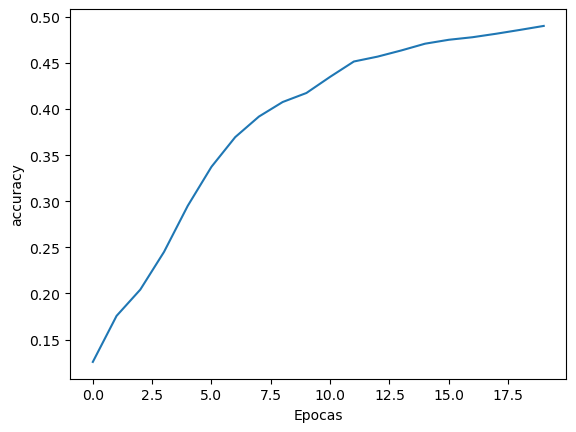

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel("Epocas")
plt.ylabel('accuracy')
plt.show()

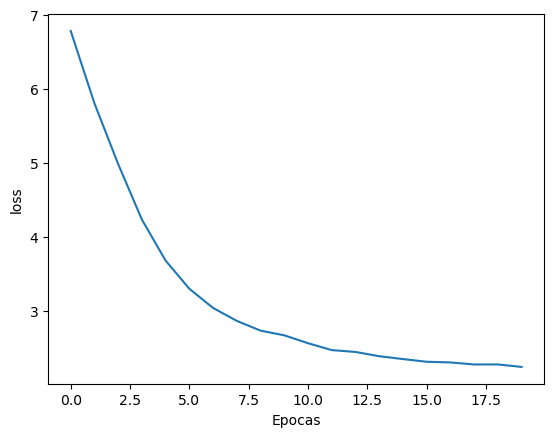

In [31]:
plt.plot(history.history['loss'])
plt.xlabel("Epocas")
plt.ylabel('loss')
plt.show()

In [53]:
seed_text = "machine learning is blowing"
token_list = tokenizer.texts_to_sequences([seed_text])
token_list = pad_sequences(token_list, maxlen=maximo-1, padding='pre')
token_list
predicted = model.predict(token_list, verbose=1)

1/1 [==============================] - 0s 28ms/step


In [54]:
indice_palavra = np.argmax(predicted)

In [55]:
for word, index in tokenizer.word_index.items():
    if index == indice_palavra:
        print(word)
        break


enough


In [59]:
seed_text = "brazil trade is amazing"
next_words = 2
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=maximo-1, padding='pre')
    
    predicted = model.predict(token_list, verbose=0)
    # predicted_int = (predicted > 0.5).astype("int32")
    predicted_int = np.argmax(predicted, axis=-1)
    # print(predicted_int)
    # print(predicted)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        # print(word, index, predicted_int[0], index == predicted_int)
        
        # print(predicted_int)
        # print(palavra_prevista)
        if index == predicted_int:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

brazil trade is amazing ways leadership
